<a href="https://colab.research.google.com/github/UMMEATHIYA/Forecasting-Models-_-ARIMA-LSTM/blob/master/ASIAN_PAINTS_FORECASTING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd

# Load the CSV file
data = pd.read_csv("/content/sample_data/Quote-Equity-ASIANPAINT-EQ-12-11-2024-to-12-02-2025.csv")

# Print column names to check for issues
print("Original Columns:", data.columns)

Original Columns: Index(['Date ', 'series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ',
       'close ', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ',
       'No of trades '],
      dtype='object')


In [7]:
# Clean column names (remove extra spaces)
data.columns = data.columns.str.strip()
print("Cleaned Columns:", data.columns)

Cleaned Columns: Index(['Date', 'series', 'OPEN', 'HIGH', 'LOW', 'PREV. CLOSE', 'ltp', 'close',
       'vwap', '52W H', '52W L', 'VOLUME', 'VALUE', 'No of trades'],
      dtype='object')


In [8]:
# Check if 'Date' column exists
if 'Date' in data.columns:
    print("'Date' column found!")
else:
    print("'Date' column not found. Available columns:", data.columns)

'Date' column found!


In [9]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

In [10]:
# Set 'Date' as the index
data.set_index('Date', inplace=True)

In [11]:
# Keep only the 'close' column for forecasting
data = data[['close']]

# Display the preprocessed data
print(data.head())

               close
Date                
2025-02-12  2,228.25
2025-02-11  2,240.85
2025-02-10  2,270.15
2025-02-07  2,271.00
2025-02-06  2,263.40


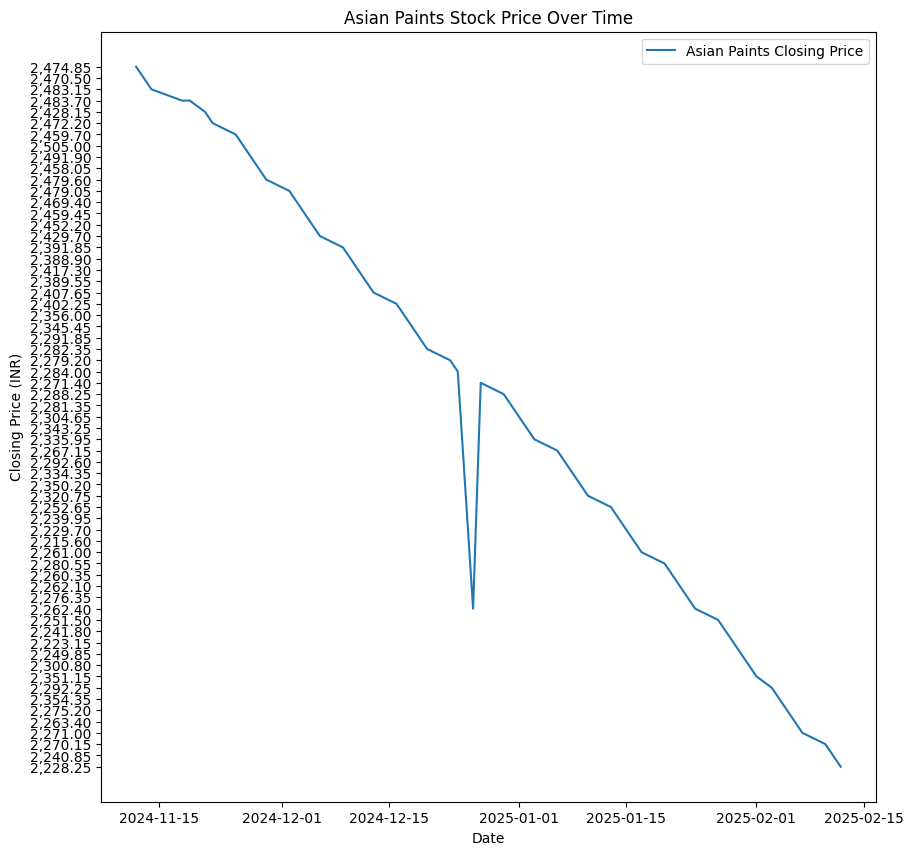

In [13]:
import matplotlib.pyplot as plt

# Plot the closing prices
plt.figure(figsize=(10, 10))
plt.plot(data['close'], label='Asian Paints Closing Price')
plt.title('Asian Paints Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (INR)')
plt.legend()
plt.show()

**ARIMA MODEL**

In [15]:
# Remove commas and convert 'close' column to numeric
data['close'] = data['close'].str.replace(',', '').astype(float)

# Check the cleaned data
print(data.head())

              close
Date               
2025-02-12  2228.25
2025-02-11  2240.85
2025-02-10  2270.15
2025-02-07  2271.00
2025-02-06  2263.40


In [16]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
result = adfuller(data['close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -1.2533233833524429
p-value: 0.6502474222217507


**Interpret the ADF Test Results**
If the p-value > 0.05, the data is not stationary. You need to difference the data.

If the p-value ≤ 0.05, the data is stationary, and you can proceed with modeling.

In [17]:
# Difference the data to make it stationary
data_diff = data.diff().dropna()

# Check stationarity again
result = adfuller(data_diff['close'])
print('ADF Statistic (after differencing):', result[0])
print('p-value (after differencing):', result[1])

ADF Statistic (after differencing): -8.846236840206698
p-value (after differencing): 1.617884441128936e-14


In [18]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(data['close'], order=(5, 1, 0))  # (p, d, q)
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                   65
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -308.428
Date:                Wed, 12 Feb 2025   AIC                            628.856
Time:                        22:24:52   BIC                            641.809
Sample:                             0   HQIC                           633.959
                                 - 65                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1262      0.122     -1.033      0.302      -0.366       0.113
ar.L2         -0.0681      0.121     -0.564      0.573      -0.305       0.169
ar.L3         -0.1118      0.148     -0.757      0.4

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsm

In [19]:
# Forecast the next 30 days
forecast = model_fit.forecast(steps=30)
print(forecast)

65    2471.827303
66    2473.367814
67    2473.859978
68    2474.483278
69    2474.156031
70    2474.170978
71    2473.991166
72    2473.973342
73    2473.972206
74    2474.012570
75    2474.021903
76    2474.030413
77    2474.025364
78    2474.021469
79    2474.018196
80    2474.018240
81    2474.018745
82    2474.019641
83    2474.019968
84    2474.020006
85    2474.019839
86    2474.019724
87    2474.019667
88    2474.019678
89    2474.019703
90    2474.019724
91    2474.019730
92    2474.019728
93    2474.019723
94    2474.019720
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


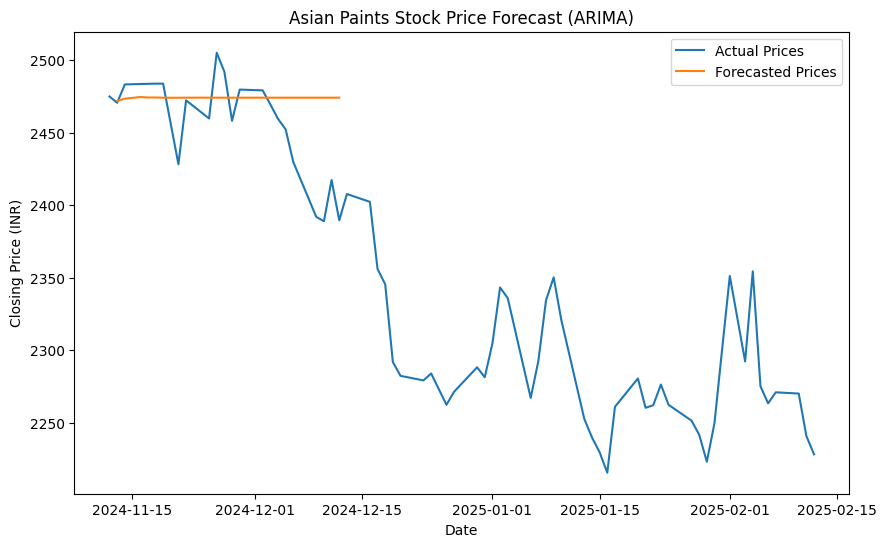

In [20]:
import matplotlib.pyplot as plt

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(data['close'], label='Actual Prices')
plt.plot(pd.date_range(start=data.index[-1], periods=31, freq='D')[1:], forecast, label='Forecasted Prices')
plt.title('Asian Paints Stock Price Forecast (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Closing Price (INR)')
plt.legend()
plt.show()

**LSTM**

In [21]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 60  # Use 60 days of data to predict the next day
X, y = create_sequences(scaled_data, seq_length)

# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=20)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.8422
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.6034
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.3999
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.2297
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - loss: 0.0984
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 0.0180
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 0.0055
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 0.0575
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 0.1040
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 0.1027
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 0.0714
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.0362
Epoch 13/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - loss: 0.0120
Epoch 14/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 0.0018
Epoch 15/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 0.0024
Epoch 16/20
1/1 ━━━━━━━━━

In [24]:
# Predict on the test set
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Reverse scaling

# Prepare actual values for comparison
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


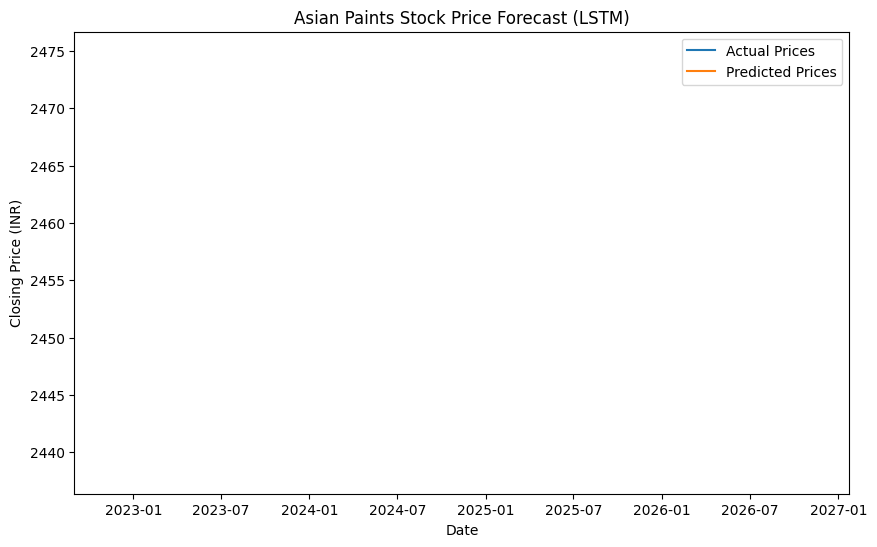

In [26]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(data.index[-len(actual):], actual, label='Actual Prices')
plt.plot(data.index[-len(predictions):], predictions, label='Predicted Prices')
plt.title('Asian Paints Stock Price Forecast (LSTM)')
plt.xlabel('Date')
plt.ylabel('Closing Price (INR)')
plt.legend()
plt.show()